In [103]:
import matplotlib.pyplot as plt
import numpy as np

In [208]:
def get_output(path):
    iter_idx = []
    test_acc = []
    train_acc = []
    test_loss = []
    train_loss = []
    with open(path) as f:
        for line in f:
            if line[:4] == 'Iter':
                #print(line)
                res = ["", ""]
                count = 0
                first_comma = -1
                record = False
                for idx, i in enumerate(line):
                    if i == ',' and first_comma < 0:
                        first_comma = idx
                    if i == '[':
                        record = True
                    elif i == ']':
                        res[count] += ']'
                        record = False
                        count += 1
                    if record:
                        res[count] += i
                test = res[0].split()
                train = res[1].split()
                iter_idx.append(int(line[5:first_comma]))
                test_acc.append(float(test[1][:-1]))
                train_acc.append(float(train[1][:-1]))
                test_loss.append(float(test[3][:-1]))
                train_loss.append(float(train[3][:-1]))
    return train_acc, train_loss, test_acc, test_loss, iter_idx

In [222]:
GD = get_output('logs/GD1.log')
BGD = get_output('logs/BGD1.log')
GGD = get_output('logs/GGD1.log')
GGDCov = get_output('logs/GGDCov1.log')
SGD = get_output('logs/SGD1.log')
GDStoF = get_output('logs/GDStoF1.log')
GDStoCov = get_output('logs/GDStoCov1.log')

### Experiments on various models

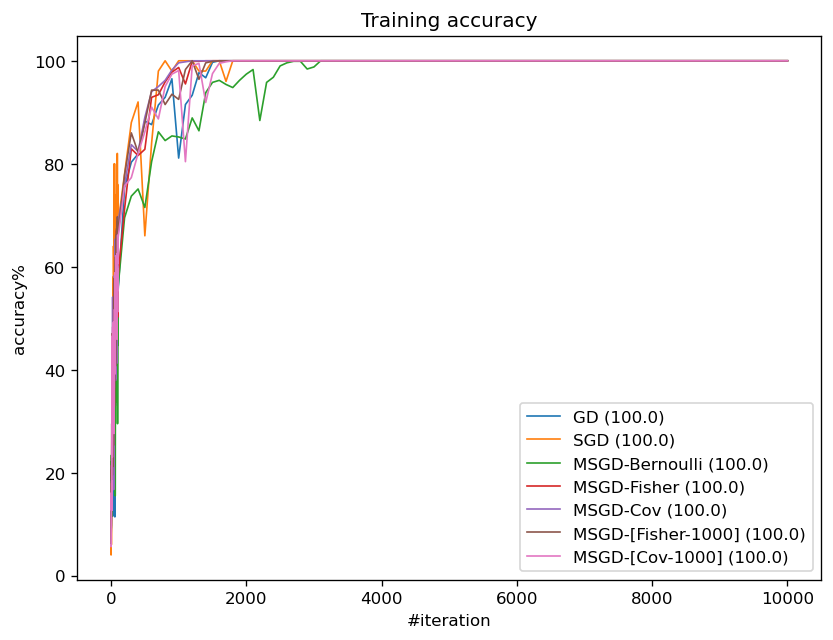

In [223]:
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(GD[-1], GD[0], label='GD ('+str(GD[0][-1])+')',linewidth=1)
plt.plot(GD[-1], SGD[0], label='SGD ('+str(SGD[0][-1])+')',linewidth=1)
plt.plot(GD[-1], BGD[0], label='MSGD-Bernoulli ('+str(BGD[0][-1])+')',linewidth=1)
plt.plot(GD[-1], GGD[0], label='MSGD-Fisher ('+str(GGD[0][-1])+')',linewidth=1)
plt.plot(GD[-1], GGDCov[0], label='MSGD-Cov ('+str(GGDCov[0][-1])+')',linewidth=1)
plt.plot(GD[-1], GDStoF[0], label='MSGD-[Fisher-1000] ('+str(SGD[0][-1])+')',linewidth=1)
plt.plot(GD[-1], GDStoCov[0], label='MSGD-[Cov-1000] ('+str(SGD[0][-1])+')',linewidth=1)
plt.title('Training accuracy')
plt.xlabel('#iteration')
plt.ylabel('accuracy%')
plt.xticks(np.arange(min(GD[-1]), max(GD[-1])+1, 2000))
plt.legend()

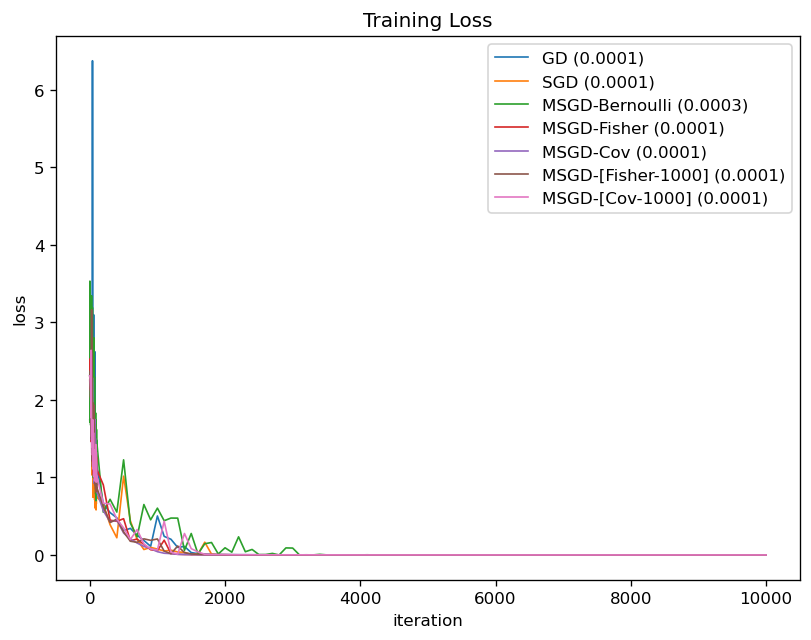

In [232]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)
plt.plot(GD[-1], GD[1], label='GD ('+str(GD[1][-1])+')',linewidth=1)
plt.plot(GD[-1], SGD[1], label='SGD ('+str(SGD[1][-1])+')',linewidth=1)
plt.plot(GD[-1], BGD[1], label='MSGD-Bernoulli ('+str(BGD[1][-1])+')',linewidth=1)
plt.plot(GD[-1], GGD[1], label='MSGD-Fisher ('+str(GGD[1][-1])+')',linewidth=1)
plt.plot(GD[-1], GGDCov[1], label='MSGD-Cov ('+str(GGDCov[1][-1])+')',linewidth=1)
plt.plot(GD[-1], GDStoF[1], label='MSGD-[Fisher-1000] ('+str(GDStoF[1][-1])+')',linewidth=1)
plt.plot(GD[-1], GDStoCov[1], label='MSGD-[Cov-1000] ('+str(GDStoCov[1][-1])+')',linewidth=1)
ax.set_title('Training Loss')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()
plt.show()

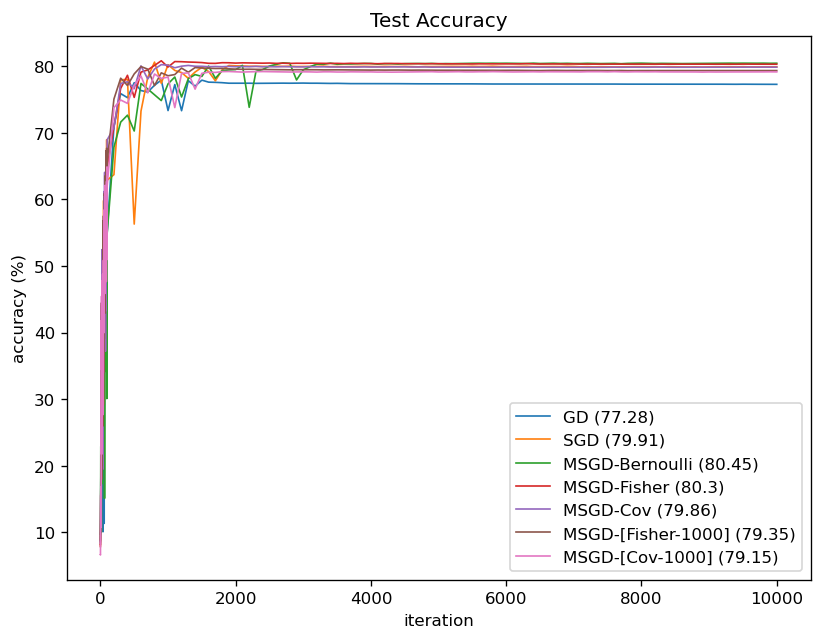

In [228]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)
plt.plot(GD[-1], GD[2], label='GD ('+str(GD[2][-1])+')',linewidth=1)
plt.plot(GD[-1], SGD[2], label='SGD ('+str(SGD[2][-1])+')',linewidth=1)
plt.plot(GD[-1], BGD[2], label='MSGD-Bernoulli ('+str(BGD[2][-1])+')',linewidth=1)
plt.plot(GD[-1], GGD[2], label='MSGD-Fisher ('+str(GGD[2][-1])+')',linewidth=1)
plt.plot(GD[-1], GGDCov[2], label='MSGD-Cov ('+str(GGDCov[2][-1])+')',linewidth=1)
plt.plot(GD[-1], GDStoF[2], label='MSGD-[Fisher-1000] ('+str(GDStoF[2][-1])+')',linewidth=1)
plt.plot(GD[-1], GDStoCov[2], label='MSGD-[Cov-1000] ('+str(GDStoCov[2][-1])+')',linewidth=1)
ax.set_title('Test Accuracy')
ax.set_xlabel('iteration')
ax.set_ylabel('accuracy (%)')
ax.legend()

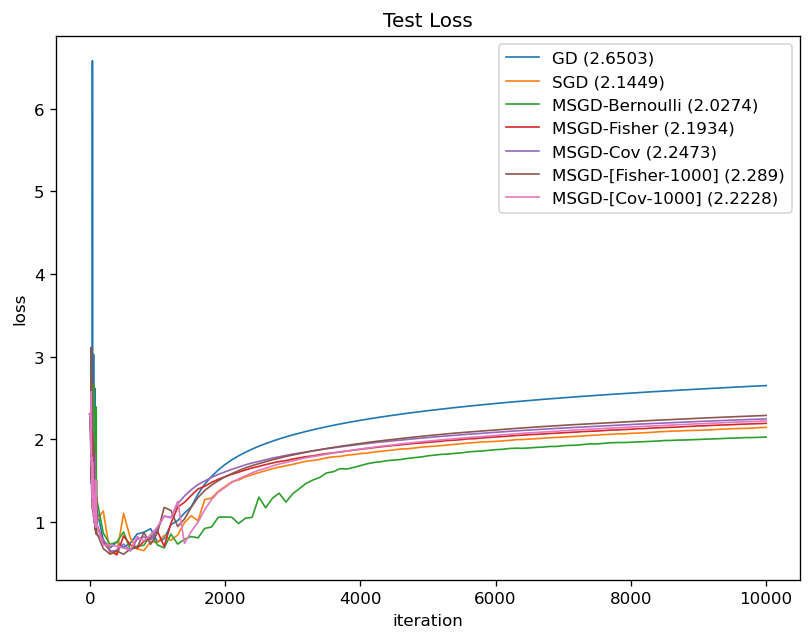

In [226]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)
plt.plot(GD[-1], GD[3], label='GD ('+str(GD[3][-1])+')',linewidth=1)
plt.plot(GD[-1], SGD[3], label='SGD ('+str(SGD[3][-1])+')',linewidth=1)
plt.plot(GD[-1], BGD[3], label='MSGD-Bernoulli ('+str(BGD[3][-1])+')',linewidth=1)
plt.plot(GD[-1], GGD[3], label='MSGD-Fisher ('+str(GGD[3][-1])+')',linewidth=1)
plt.plot(GD[-1], GGDCov[3], label='MSGD-Cov ('+str(GGDCov[3][-1])+')',linewidth=1)
plt.plot(GD[-1], GDStoF[3], label='MSGD-[Fisher-1000] ('+str(GDStoF[3][-1])+')',linewidth=1)
plt.plot(GD[-1], GDStoCov[3], label='MSGD-[Cov-1000] ('+str(GDStoCov[3][-1])+')',linewidth=1)
ax.set_title('Test Loss')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()

### Experiments on MSGD-Fisher

In [229]:
GDF1000 = GDStoF
GDF100 = get_output('logs/GDStoF100.log')
GDF50 = get_output('logs/GDStoF50.log')
GDF10 = get_output('logs/GDStoF10.log')

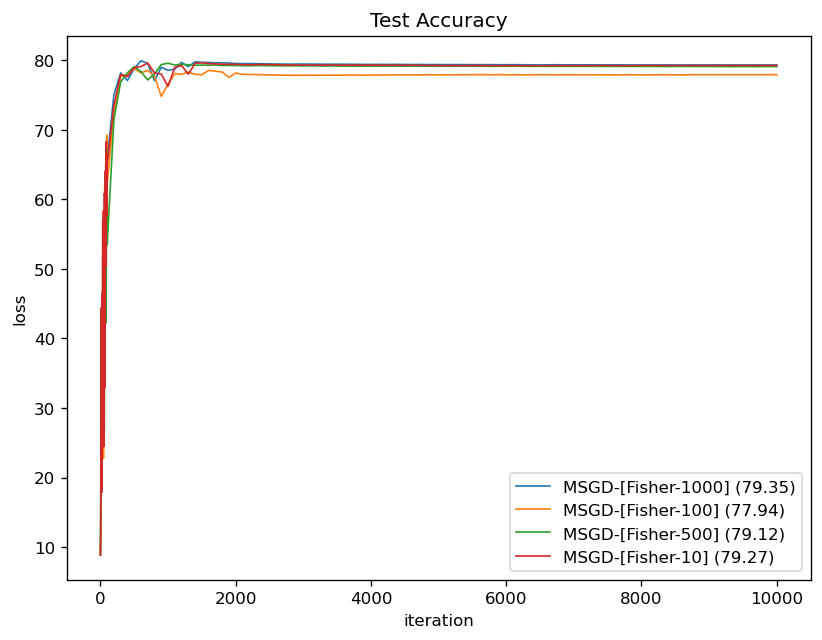

In [231]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)
plt.plot(GDF1000[-1], GDF1000[2], label='MSGD-[Fisher-1000] ('+str(GDF1000[2][-1])+')',linewidth=1)
plt.plot(GDF100[-1], GDF100[2], label='MSGD-[Fisher-100] ('+str(GDF100[2][-1])+')',linewidth=1)
plt.plot(GDF50[-1], GDF50[2], label='MSGD-[Fisher-500] ('+str(GDF50[2][-1])+')',linewidth=1)
plt.plot(GDF10[-1], GDF10[2], label='MSGD-[Fisher-10] ('+str(GDF10[2][-1])+')',linewidth=1)
ax.set_title('Test Accuracy')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()

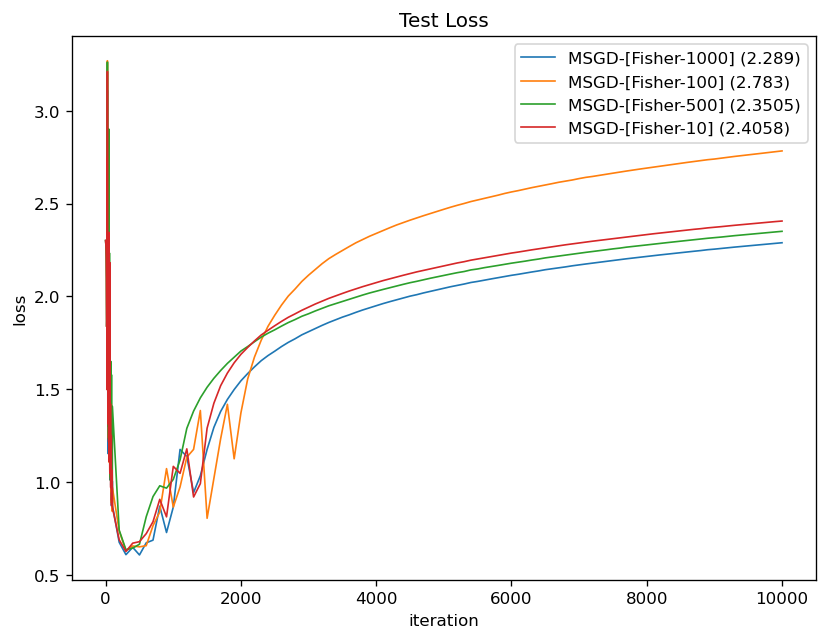

In [230]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)
plt.plot(GDF1000[-1], GDF1000[3], label='MSGD-[Fisher-1000] ('+str(GDF1000[3][-1])+')',linewidth=1)
plt.plot(GDF100[-1], GDF100[3], label='MSGD-[Fisher-100] ('+str(GDF100[3][-1])+')',linewidth=1)
plt.plot(GDF50[-1], GDF50[3], label='MSGD-[Fisher-500] ('+str(GDF50[3][-1])+')',linewidth=1)
plt.plot(GDF10[-1], GDF10[3], label='MSGD-[Fisher-10] ('+str(GDF10[3][-1])+')',linewidth=1)
ax.set_title('Test Loss')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()

### Experiments on MSGD-Cov

In [234]:
GDF1000 = GDStoCov
GDF100 = get_output('logs/GDStoCov100.log')
GDF50 = get_output('logs/GDStoCov50.log')
GDF10 = get_output('logs/GDStoCov10.log')

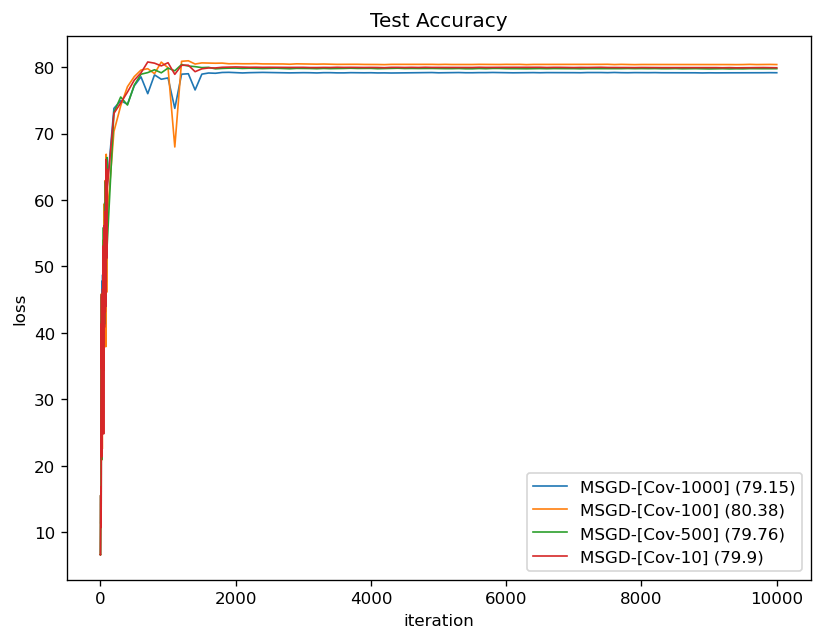

In [235]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)
plt.plot(GDF1000[-1], GDF1000[2], label='MSGD-[Cov-1000] ('+str(GDF1000[2][-1])+')',linewidth=1)
plt.plot(GDF100[-1], GDF100[2], label='MSGD-[Cov-100] ('+str(GDF100[2][-1])+')',linewidth=1)
plt.plot(GDF50[-1], GDF50[2], label='MSGD-[Cov-500] ('+str(GDF50[2][-1])+')',linewidth=1)
plt.plot(GDF10[-1], GDF10[2], label='MSGD-[Cov-10] ('+str(GDF10[2][-1])+')',linewidth=1)
ax.set_title('Test Accuracy')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()

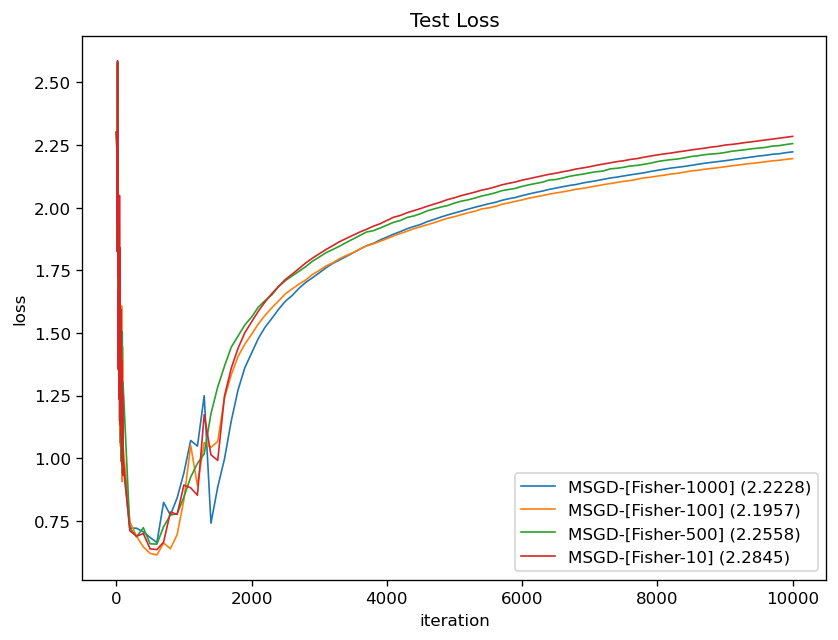

In [236]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)
plt.plot(GDF1000[-1], GDF1000[3], label='MSGD-[Fisher-1000] ('+str(GDF1000[3][-1])+')',linewidth=1)
plt.plot(GDF100[-1], GDF100[3], label='MSGD-[Fisher-100] ('+str(GDF100[3][-1])+')',linewidth=1)
plt.plot(GDF50[-1], GDF50[3], label='MSGD-[Fisher-500] ('+str(GDF50[3][-1])+')',linewidth=1)
plt.plot(GDF10[-1], GDF10[3], label='MSGD-[Fisher-10] ('+str(GDF10[3][-1])+')',linewidth=1)
ax.set_title('Test Loss')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()

### Experiments on noise magnitude

In [245]:
GDF1000 = get_output('logs/GDStoCovnoise1000.log')
GDF500 = get_output('logs/GDStoCovnoise500.log')
GDF100 = get_output('logs/GDStoCovnoise100.log')
GDF50 = get_output('logs/GDStoCovnoise50.log')
GDF10 = get_output('logs/GDStoCovnoise10.log')

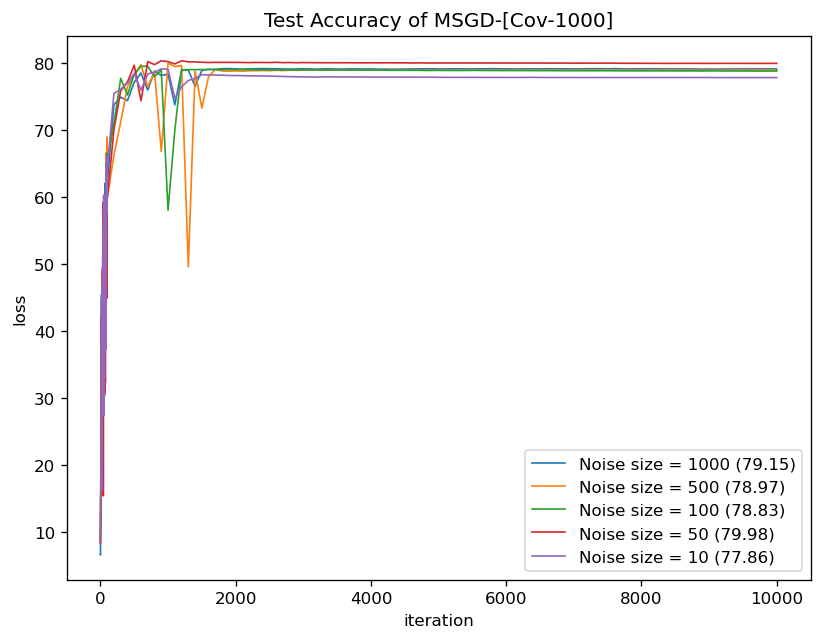

In [247]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)
plt.plot(GDF1000[-1], GDF1000[2], label='Noise size = 1000 ('+str(GDF1000[2][-1])+')',linewidth=1)
plt.plot(GDF500[-1], GDF500[2], label='Noise size = 500 ('+str(GDF500[2][-1])+')',linewidth=1)
plt.plot(GDF100[-1], GDF100[2], label='Noise size = 100 ('+str(GDF100[2][-1])+')',linewidth=1)
plt.plot(GDF50[-1], GDF50[2], label='Noise size = 50 ('+str(GDF50[2][-1])+')',linewidth=1)
plt.plot(GDF10[-1], GDF10[2], label='Noise size = 10 ('+str(GDF10[2][-1])+')',linewidth=1)
ax.set_title('Test Accuracy of MSGD-[Cov-1000]')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()

In [248]:
GDF1000 = get_output('logs/GDStoFnoise1000.log')
GDF500 = get_output('logs/GDStoFnoise500.log')
GDF100 = get_output('logs/GDStoFnoise100.log')
GDF50 = get_output('logs/GDStoFnoise50.log')
GDF10 = get_output('logs/GDStoFnoise10.log')

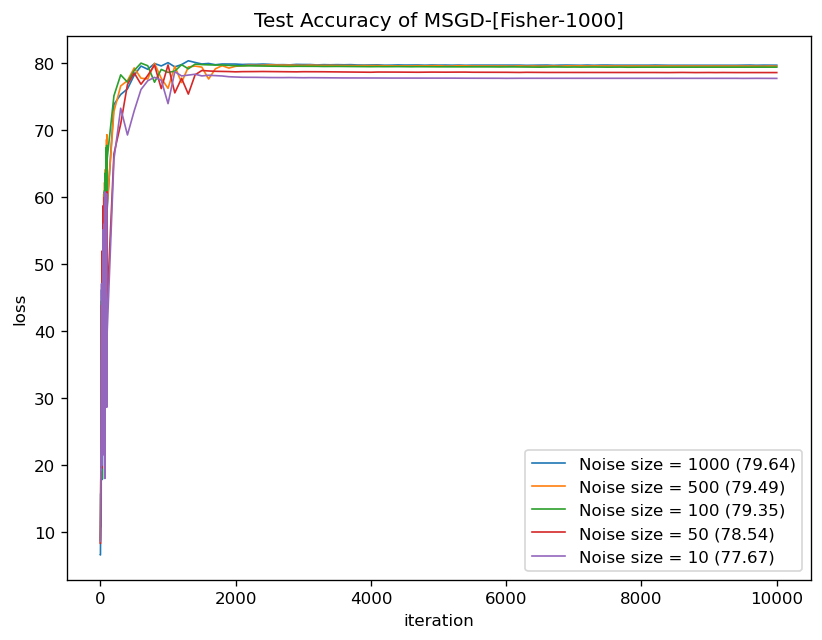

In [249]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)
plt.plot(GDF1000[-1], GDF1000[2], label='Noise size = 1000 ('+str(GDF1000[2][-1])+')',linewidth=1)
plt.plot(GDF500[-1], GDF500[2], label='Noise size = 500 ('+str(GDF500[2][-1])+')',linewidth=1)
plt.plot(GDF100[-1], GDF100[2], label='Noise size = 100 ('+str(GDF100[2][-1])+')',linewidth=1)
plt.plot(GDF50[-1], GDF50[2], label='Noise size = 50 ('+str(GDF50[2][-1])+')',linewidth=1)
plt.plot(GDF10[-1], GDF10[2], label='Noise size = 10 ('+str(GDF10[2][-1])+')',linewidth=1)
ax.set_title('Test Accuracy of MSGD-[Fisher-1000]')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()